# Linear Regression, Logistic Regression, and K-nearest neighbors

Linear regression is a useful tool for predicting a quantitative response.

Logistic Regression and K-nearest neighbors are useful for classification. 


In [ ]:
# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

##Simple Linear Regression

We assume that the true relationship between X and Y takes the form 
$Y=f(X)+ϵ$
for some unknown function f, where ε is a mean-zero random error term and 
\begin{align}
f(X)=\beta_{0}+\beta_{1} X
\end{align}
The unkown paraters $\beta_{0}$ and $\beta_{1}$ are intercept  and slope. Let $\hat{Y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i}$ be the prediction for Y based on the ith value of X. Then $e_{i} = Y_{i} − \hat{Y}_{i}$ represents the ith residual—this is the difference between the ith observed response value and the ith response value that is predicted by our linear model. We define the residual sum of squares (RSS) as
residual residual sum of squares
$R S S = e^{2}_{1} + e^{2}_{2} + · · · + e^{2}_{n}$.
The goal is to find $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ such that RSS is minimized.


In general, for the multiple linear regression, there are p+1 parameters
$\beta=(\beta_{0},\beta_{1},\cdots,\beta_{p})^{T}_{p\times 1}$.
There are N obervations with p features.
\begin{align}
        X_{N \times (p+1)} = \begin{pmatrix}
        1 & x_{11}&\cdots x_{p1} \\
        1 & x_{21} &\cdots x_{2p} \\
        1 & x_{31} &\cdots x_{3p} \\
          &\cdots       &\cdots\\
        1 & x_{N1} &\cdots x_{Np} \\
        \end{pmatrix}.
    \end{align}
$y_{N \times 1}=X\beta$ is the response/output.
The least squares coefficient estimates 
$\hat{\beta}=(X^{T}X)^{-1}X^{T}Y$, and $\hat{y}=X\hat{\beta}=X(X^{T}X)^{-1}X^{T}Y $.

$E(\hat{\beta})=(X^{T}X)^{-1}X^{T}E(Y)=\beta$,
$Var(\hat{\beta})=(X^{T}X)^{-1}Var(ϵ)=(X^{T}X)^{-1}σ^{2}$.

$R^{2}$ Statistic measures the proportion of variability in Y that can be explained using X
\begin{align}
        R^{2}= = 1-\frac{RSS}{TSS},
    \end{align}
where $TSS= ∑_{i=1}^{N}(y_{i} − \overline{y})^{2}$ is the total sum of squares. In the simple linear regression setting, 
$R^{2} = r^{2}$ where r is the correlation between X and Y; it meaures the linear relationship between X and Y.

Qualitative Predictors with Only Two Levels

\begin{align}
        X_{i} = \left\{
        \begin{array}{cl}
        1 & \text{if person i is female} \\
        0 & \text{if person i is male}.
        \end{array}
        \right.
    \end{align}
We will see examples later with Categorical predictors.

### $y=2+3X+\epsilon$

In [ ]:
mu, sigma = 0, 3 # mean and standard deviation
n=400
𝜖 = np.random.normal(mu, sigma, n)
X = np.arange(-5, 5, 1/40)

Z=2+3*X+ 0.5*X**2
df = pd.DataFrame({'x':X,'z':Z})
plt.plot('x', 'z',data=df,color='red')

X = np.random.uniform(-5,5, n)
𝜖 = np.random.normal(mu, sigma, n)
Y=2+3*X+ 0.5*X**2+ 𝜖 
Z=2+3*X

df = pd.DataFrame({'x':X, 'y':Y,'z':Z})
plt.scatter('x','y',data=df,color='blue')
plt.plot('x', 'z',data=df,color='green')
plt.show()

In [ ]:
mu, sigma = 0, 2 # mean and standard deviation
n=100
𝜖 = np.random.normal(mu, sigma, n)
X = np.random.uniform(-2,2, n)
Y=2+3*X+𝜖
Z=2+3*X
Y[0]=9
df = pd.DataFrame({'x':X, 'y':Y,'z':Z})
plt.plot('x', 'z',data=df,color='red')
plt.scatter('x','y',data=df,color='blue')
plt.show()

## Multiple Linear Regression
$f(X)=\beta_{0}+\beta_{1}*X_{1}+\beta_{2}*X_{2}+ϵ$.

$\beta_{0}=3$,

$\beta_{1}=2$,

$\beta_{2}=-1$,

$ϵ ∼~ N(0,1)$

In [ ]:
X

In [ ]:

#####Plot the surface 
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

xline, yline = np.meshgrid(X, Y)
Z=3+xline*2-yline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# Plot a 3D surface
ax.plot_surface(xline, yline, Z)
####
mu=[0,0] # mean and standard deviation
cov = [[1, 0], [0, 1]]
n=10000
𝜖=np.random.normal(0,1, n)
X=pd.DataFrame(np.random.multivariate_normal(mu, cov, n))
#X=X.transpose()
beta=[2,-1]
beta=pd.DataFrame(beta)

Y=3+X.dot(beta)+pd.DataFrame(𝜖)
x = np.array(X[0])
y = np.array(X[1])
#ax.scatter3D(X[0], X[1], Y, c=Y, cmap='Greens')
ax.scatter3D(x, y, Y, c=Y, cmap='Greens')
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Z')


plt.show()

### Application Example

In real life proble, suppose 
$X=(X_{1},X_{2})$ is (the square feet of a house,nyears built), Y is the prices of a house. We want to know:

Is there a relationship between the square feet of the house and the price of the house?

How strong is the relationship between them?

Which contribute more to the price of the house: The lot size or the years of the house?

How accurately can we estimate the effect of each predictors?

How accurately can we predict future price of the house?

Is the relationship linear?

## Watch out for Potential Problems in fitting a linear regression
1. Non-linearity of the Data.

2. Non-constant Variance of Error Terms:Residual plots

3. outliers: An outlier is a point for which $y_{i}$ is far from the value predicted by the model: Residual plots can be used to identify outliers. Outlier impact the RSE and $R^{2}$. RSE will impact the confidence interval of the estimates.

4. High Leverage Points: observations with high leverage have an unusual value for $x_{i}$. the predictor value for this observation is large relative to the other observations.Sometimes, neither its value for $X_{1}$ nor its value for $X_{2}$ is unusual. So if we examine just $X_{1}$ or just $X_{2}$, we will fail to notice this high leverage point. 

5. Collinearity: refers to the situation in which two or more predictor variables are closely related to one another. The first solution is to drop one of the problematic variables from the regression. The second solution is to combine the collinear variables together into a single predictor. Collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_{j}$ to grow. Note in general,
$Var(X_{1}+X_{2})=Var(X_{1})+Var(X_{2})+2COV(X_{1},X_{2})$. 
Therefore, the t-statistic, calculated by dividing the standard error of $\hat{\beta}_{j}$, will be smaller, which in results,  fail to reject $H_{0} : β_{j} = 0$. 
Check correlations of predictors by df.corr(), pearson correlation. Here df is the dataframe with values of the predictors.

### Non-linearity of the Data

1. Linear fit

2. Non Linear fit

In [ ]:
mu, sigma = 0, 2 # mean and standard deviation
n=4000
X = np.random.uniform(-5,5, n)
X=X.reshape(-1,1)
X

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

mu, sigma = 0, 2 # mean and standard deviation
n=4000
X = np.random.uniform(-5,5, n)
𝜖 = np.random.normal(mu, sigma, n)
Y=2+3*X+ 0.5*X**2+ 𝜖 
X=X.reshape(-1,1)
reg = model.fit(X, Y)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

mu, sigma = 0, 2 # mean and standard deviation
n=4000
X = np.random.uniform(-5,5, n)
𝜖 = np.random.normal(mu, sigma, n)
Y=2+3*X+ 0.5*X**2+ 𝜖 
X=X.reshape(-1,1)
reg = model.fit(X, Y)
reg.sco
r_sq=reg.score(X,Y)
print('coefficient of determination:', r_sq)
y_pred = model.predict(X)
#print('predicted response:', y_pred, sep='\n')


coefficient of determination: 0.8067828991281424


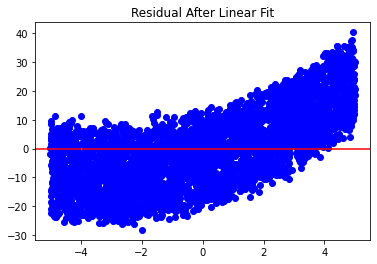

In [ ]:
plt.scatter(X,Y-y_pred,color='blue')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title("Residual After Linear Fit")
plt.show()


coefficient of determination: 0.9568960623158148
intercept: 1.998104025176132
coefficients: [0.         3.01758833 0.49926892]


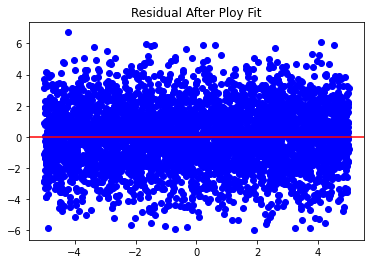

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
transformer=PolynomialFeatures(degree=2)
transformer.fit(X)
X_ = transformer.transform(X)
model = LinearRegression().fit(X_, Y)
r_sq = model.score(X_, Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
y_pred = model.predict(X_)
plt.scatter(X,Y-y_pred,color='blue')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title("Residual After Ploy Fit")
plt.show()

In [ ]:
X=X.reshape(-1)
df = pd.DataFrame({'x':X, 'y':Y})
df.corr()

,x,y
x,1.000000,0.899371
y,0.899371,1.000000


### Outliers

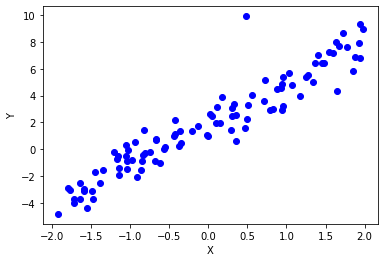

In [ ]:
mu, sigma = 0, 1 # mean and standard deviation
n=100
𝜖 = np.random.normal(mu, sigma, n)
X = np.random.uniform(-2,2, n)
Y=2+3*X+𝜖
Y[0]=Y[0]+6
#plt.plot(X, Y,color='red')
plt.scatter(X,Y,color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Logistic Regression

The response variable is qualitative, or categorical; Predicting a qualitative response for an observation is classification problems. Classification problems occur often, perhaps even more so than regression problems. 
Two most often used model is logistic regression, and K-nearest neighbors. 
Some examples include:
1. A person arrives at the emergency room with a set of symptoms that could possibly be attributed to one of three medical conditions. Which of the three conditions does the individual have?

2. An online banking service must be able to determine whether or not a transaction being performed on the site is fraudulent, on the basis of the user’s IP address, past transaction history, and so forth.

3. On the basis of DNA sequence data for a number of patients with and without a given disease, a biologist would like to figure out which DNA mutations are deleterious (disease-causing) and which are not.

Consider a data set, where the response/result falls into one of two categories, Yes or No, or 0/1.  Rather than modeling this response/result Y directly, logistic regression models the probability that Y belongs to a particular category $p(X)=Pr(Y=1|X)$. Using a linear regression model to represent these probabilities, it is:
$p(X) = G(f(X))$. Here we need to model p(X) using a function $G$ that gives outputs between 0 and 1 for all values of X. Many functions meet this description. In logistic regression, we use the logistic function,
$G(x)=e^{x}/(1+e^{x})$. After some algebra,
\begin{align}
log p(X)/(1-p(X)) =f(X)=\beta_{0}+\beta_{1} X
\end{align}

For a given $\alpha$, if
 $𝑝(𝑋)=𝑃𝑟(𝑌=1|𝑋)>\alpha$, then Y is classified into class 1, or else into class 0. Here $\alpha =0.5$ or other numbers, depends on practice needs.

In [ ]:
n=100
X = np.random.uniform(-10,10, n)
count, bins, ignored = plt.hist(X, 30, density=True)
plt.plot(bins, np.exp(bins)/(1+np.exp(bins)),linewidth=2, color='r')
#plt.savefig('saved_figure.pdf')
plt.savefig('saved_figure.png')
plt.show()

In [ ]:
#from pyparsing.util import col
mu, sigma = 0, 0.1 # mean and standard deviation
n=100
𝜖 = np.random.normal(mu, sigma, n)
X = np.arange(-5, 5, 1/40)
Z=np.exp(X)/(1+np.exp(X))
df = pd.DataFrame({'x':X,'z':Z})
plt.plot('x', 'z',data=df,color='red')
X = np.random.uniform(-5,5, n)
Y=np.exp(X)/(1+np.exp(X))+𝜖

df = pd.DataFrame({'x':X, 'y':Y})
plt.scatter('x', 'y',data=df,color='blue')
plt.show()

## KNN,K-nearest neighbors, classifier

Given a positive integer K and a test observation $x_{0}$, the KNN classifier first identifies the K points in the training data that are closest to $x_{0}$, represented by $N_{0}$. It then estimates the conditional probability for class j as the fraction of points in $N_{0}$ whose response values equal j:
$Pr(Y =j \mid X =x_{0})= \frac{1}{K} ∑_{i \in N_{0}}  I(y_{i} =j)$. KNN classifies the test observation $x_{0}$ to the class with the largest probability.

X: is array-like of shape (n samples, m_features).
y: is array-like, sparse matrix of shape (n_samples,)

standardize the data so that all variables are given a mean of zero and a standard deviation of one

## K-nearest neighbors regression(KNN-regression)

Given a value for K and a prediction point $x_{0}$, KNN regression first identifies the K training observations that are closest to $x_{0}$, represented by $N_{0}$. It then estimates $f(x_{0})$ using the average of all the training responses in $N_{0}$. In other words,
$f(x_{0})=\frac{1}{K} ∑_{i \in N_{0}} y_{i}$

## Questions:

1. Read book 3.1, 3.2

2. What is a 95% confidence interval? (page 66 of the book).

3. What is a Hypothesis? What is a p value?

4. Carefully explain the differences between the KNN classifier and KNN regression methods.

5. In what setting will a parametric approach such as least squares linear regression outperform a non-parametric approach such as KNN regression?





### Answer

2. A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. The 95% confidence interval for paramter $\beta$ is
$[\hat{\beta}-2SE(\hat{\beta}), \hat{\beta}+2SE(\hat{\beta})]$, where $SE(\hat{\beta})=\sqrt{var(\hat{\beta})}$

3. For $y_{N \times 1}=\beta_{0}+X\beta$, hypothesis $H_{0}$: $\beta=0$.
To test the null hypothesis, we need to determine whether $\hat{\beta}$, our estimate for $\beta$, is sufficiently far from zero that we can be confident that $\beta$ is non-zero. Define t-statistics
$t=\frac{\hat{\beta}-0}{SE(\hat{\beta})}$. It measures the number of standard deviations that $\hat{\beta}$ is away from 0; it is a t-distribution with n − 2 degrees of freedom. The t- distribution is quite similar to the normal distribution(see the normal distribution density plot). For example, if $\hat{\beta}=7.0325$, and $SE(\hat{\beta})=0.4578$, then t=15. p-value=Prob(X>=15)=0.0001(see plot below) is very small. p-value is the probability of observing any value equal to |t| or larger, assuming $\beta=0$. A small p-value, indicated that we can not reject $H_{0}$(or to say $\beta=0$ is not true), therefore there is an association between the predictor and the response.


In [1]:
mu, sigma = 0, 1 # mean and standard deviation
n=1000
x = np.random.normal(mu, sigma, n)

count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.ylabel('density')
plt.xlabel('x')
#plt.xlim([-20, 20])
plt.title("Normal Distribution")
plt.axvline(x=-2)
plt.axvline(x=2)
plt.show()

#95% is sbetween -2 and 2, p=0.05

NameError: ignored